In [19]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from datetime import datetime

%matplotlib inline

This notebook introduces a linear regression analysis between uptake and time and uptake and CO2 concentration using Peylin global integrated fluxes and a weighting of CO2 concentration.

UPTAKE: Use one model of fluxes. Use pickle of spatially integrated fluxes (which is essentially just flux data at monthly resolution.

CO2: In CO2 folder.

# Flux against time

In [6]:
fRayner = open('./../Output/output_raw/output_all/Rayner_all/spatial.pickle', 'rb')
Rayner = pickle.load(fRayner)
Rayner

,time,earth_land_total,south_land_total,trop_land_total,north_land_total,earth_ocean_total,south_ocean_total,trop_ocean_total,north_ocean_total
0,1992-01-16 00:00:00,-0.206387,0.00262046,-0.184588,-0.0244196,0.0915499,0.0801271,-0.0126573,0.02408
1,1992-02-16 00:00:00,-0.32326,0.0148799,-0.138804,-0.199336,0.0114948,0.0372992,-0.0339515,0.00814714
2,1992-03-16 00:00:00,-0.455497,-0.005087,-0.104469,-0.345941,0.00561883,0.0864351,-0.0636996,-0.0171167
3,1992-04-16 00:00:00,-0.00856157,0.0402408,0.0306667,-0.0794691,0.044103,0.0723724,-0.0453629,0.0170934
4,1992-05-16 00:00:00,0.179045,0.0245111,0.15515,-0.000615481,0.0225338,0.0744753,-0.0109653,-0.0409763
5,1992-06-16 00:00:00,-0.225475,-0.025228,-0.0700347,-0.130212,-0.111758,-0.00992819,-0.0666191,-0.0352107
6,1992-07-16 00:00:00,-0.697192,0.0797032,-0.311337,-0.465558,-0.0910569,-0.0238922,-0.0394592,-0.0277055
7,1992-08-16 00:00:00,-0.42653,0.0988206,-0.249377,-0.275973,-0.19569,-0.0554427,-0.0739632,-0.0662838
8,1992-09-16 00:00:00,-0.215082,0.0945276,0.0111171,-0.320727,-0.065589,0.0154006,-0.0699569,-0.0110327
9,1992-10-16 00:00:00,0.0799265,0.0145738,0.0478405,0.0175122,-0.0284315,0.0588602,-0.0310148,-0.0562769


In [34]:
Rayner_time = []
for date in Rayner.time:
    Rayner_time.append(date.strftime())

Rayner.time = pd.to_datetime(Rayner_time)

In [35]:
Rayner

,time,earth_land_total,south_land_total,trop_land_total,north_land_total,earth_ocean_total,south_ocean_total,trop_ocean_total,north_ocean_total
0,1992-01-16,-0.206387,0.00262046,-0.184588,-0.0244196,0.0915499,0.0801271,-0.0126573,0.02408
1,1992-02-16,-0.32326,0.0148799,-0.138804,-0.199336,0.0114948,0.0372992,-0.0339515,0.00814714
2,1992-03-16,-0.455497,-0.005087,-0.104469,-0.345941,0.00561883,0.0864351,-0.0636996,-0.0171167
3,1992-04-16,-0.00856157,0.0402408,0.0306667,-0.0794691,0.044103,0.0723724,-0.0453629,0.0170934
4,1992-05-16,0.179045,0.0245111,0.15515,-0.000615481,0.0225338,0.0744753,-0.0109653,-0.0409763
5,1992-06-16,-0.225475,-0.025228,-0.0700347,-0.130212,-0.111758,-0.00992819,-0.0666191,-0.0352107
6,1992-07-16,-0.697192,0.0797032,-0.311337,-0.465558,-0.0910569,-0.0238922,-0.0394592,-0.0277055
7,1992-08-16,-0.42653,0.0988206,-0.249377,-0.275973,-0.19569,-0.0554427,-0.0739632,-0.0662838
8,1992-09-16,-0.215082,0.0945276,0.0111171,-0.320727,-0.065589,0.0154006,-0.0699569,-0.0110327
9,1992-10-16,0.0799265,0.0145738,0.0478405,0.0175122,-0.0284315,0.0588602,-0.0310148,-0.0562769


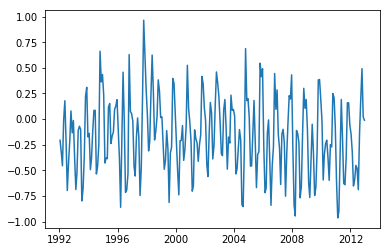

In [36]:
# Plot global land against time
plt.plot(Rayner.time, Rayner.earth_land_total)

In [39]:
# Linear regression: global land uptake vs. time
reg_land = stats.linregress(Rayner.time, Rayner.earth_land_total)
slope_land = reg_land[0]
intercept_land = reg_land[1]

#plt.plot(Rayner.time, Rayner.earth_land_total)
#plt.plot(Rayner.time, slope_land*Rayner.time+intercept_land, color ='r')

TypeError: ufunc add cannot use operands with types dtype('<M8[ns]') and dtype('<M8[ns]')

In [43]:
dir(Rayner.time.iloc[0])

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_date_attributes',
 '_date_repr',
 '_get_date_name_field',
 '_get_start_end_field',
 '_has_time_component',
 '_repr_base',
 '_round',
 '_short_repr',
 '_time_repr',
 'asm8',
 'astimezone',
 'ceil',
 'combine',
 'ctime',
 'date',
 'day',
 'day_name',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'dst',
 'floor',
 'fold',
 'freq',
 'freqstr',
 'fromisoformat',
 'fromordinal',
 'fromtimestamp',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_month_start',
 'is_quarter_end',
 'is_quarter_start',
 'is_year_end',
 'is_year_st

In [54]:
Rayner.time.iloc[0].to_datetime64()

numpy.datetime64('1992-01-16T00:00:00.000000000')